In [27]:
#importing packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
#this is the 4 year model
df = pd.read_stata('/Users/albertoguzman-alvarez/Box Sync/Geography and Higher Ed/final tx files/4yr_Long.dta')


In [29]:
df.head()

,market_id,imp,meanduration,sdduration,meanadm_rate,sdadm_rate,meanpcip04,sdpcip04,meanpcip11,sdpcip11,...,meancompletion_200,sdcompletion_200,meanfulltime_retention,sdfulltime_retention,meantransfer150,sdtransfer150,meanent_ex_percentile75,sdent_ex_percentile75,meanent_ex_percentile25,sdent_ex_percentile25
0,1.0,1,47.849998,6.209393,0.749734,0.283391,0.000418,0.007252,0.056768,0.070364,...,0.427792,0.231569,0.679621,0.109954,0.099933,0.137420,47.959747,27.549383,26.490273,30.871868
1,2.0,1,41.583332,0.000000,0.907800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.436100,0.000000,0.691000,0.000000,0.004000,0.000000,63.000000,0.000000,46.000000,0.000000
2,3.0,1,3.386667,0.000000,0.907800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.436100,0.000000,0.691000,0.000000,0.004000,0.000000,63.000000,0.000000,46.000000,0.000000
3,4.0,1,45.201088,9.924629,0.728829,0.257236,-0.000232,0.016795,0.043549,0.067346,...,0.448069,0.211343,0.691879,0.116088,0.120954,0.137643,47.599327,28.866264,26.337517,29.618793
4,5.0,1,17.582500,14.625662,0.747332,0.273951,0.000655,0.007069,0.055101,0.068304,...,0.438180,0.227543,0.685489,0.108787,0.093687,0.135090,49.337261,27.179613,27.709631,30.221241


In [30]:
#dropping duplicates
#df=df.drop_duplicates(subset=['newid'],keep='first')

In [31]:
df = df[df.imp == 1]

In [32]:
df.shape

(9689, 126)

In [7]:

#add market id and imp
#quality 4-year

mean_vars="meaninexpfte meanappl_sch_pct_ge5 meancompletion_150 meancompletion_200 meanfulltime_retention meantransfer150 meanpftfac meanpcip04 meanpcip11 meanpcip14 meanpcip15 meanpcip27 meanpcip40 meanpcip45 meanpcip51 meanpcip52 meanc150white meanc150black meanc150hisp meanc150asian meanc150aian meanc150nhpi"

In [8]:
#affordability 4-year

aff="meanpctpell meanpctfloan meancompl_rpy_7yr_rt meannoncom_rpy_7yr_rt meanlo_inc_rpy_7yr_rt meandiff_rpy_1stgen meaninc_pct_lo meaninc_pct_m1 meanpar_ed_pct_1stgen meangrad_debt_mdn meanwdraw_debt_mdn meanlo_inc_debt_mdn meancuml_debt_p75 meancuml_debt_p25 meanloan_ever meanpell_ever meanmd_faminc meandiff_pell_debt meandiff_1stgen_debt meanlowinc_netprice meanmiddleinc_netprice meanlowinc_rec_aid meanhi_inc_rpy_7yr_rt meanmd_inc_rpy_7yr_rt meandiff_rpy_pell meaninc_pct_h2 meanmd_inc_debt_mdn meanhi_inc_debt_mdn meanhighinc_netprice"

In [9]:
#quality 2-year
#qual_2="meanpftfac meanc150white meanc150black meanc150hisp meanc150asian meanc150aian meanc150nhpi  meanpar_ed_pct_1stgen  meanappl_sch_pct_ge5 meancompletion_150 meancompletion_200 meanfulltime_retention meantransfer150 meaninexpfte "




In [10]:
#affordability 2-year
#aff_2="meanpctpell meanpctfloan meanrpy_7yr_rt meancompl_rpy_7yr_rt meannoncom_rpy_7yr_rt meanlo_inc_rpy_7yr_rt meanmd_inc_rpy_7yr_rt meanhi_inc_rpy_7yr_rt meanpell_rpy_7yr_rt meannopell_rpy_7yr_rt meanfirstgen_rpy_7yr_rt meannotfirstgen_rpy_7yr_rt meaninc_pct_m1 meaninc_pct_m2 meaninc_pct_h1 meaninc_pct_h2 meanloan_ever meanpell_ever meanlowinc_rec_aid meangrad_debt_mdn meanwdraw_debt_mdn meanlo_inc_debt_mdn meanmd_inc_debt_mdn meanhi_inc_debt_mdn meanpell_debt_mdn meannopell_debt_mdn meanfirstgen_debt_mdn meannotfirstgen_debt_mdn meancuml_debt_p75 meancuml_debt_p25 meanfaminc meanmd_faminc meanlowinc_netprice meanmiddleinc_netprice meanhighinc_netprice"

In [11]:
#do combined measures

In [12]:
mean_vars = mean_vars.split()

In [13]:
print(mean_vars)

['meaninexpfte', 'meanappl_sch_pct_ge5', 'meancompletion_150', 'meancompletion_200', 'meanfulltime_retention', 'meantransfer150', 'meanpftfac', 'meanpcip04', 'meanpcip11', 'meanpcip14', 'meanpcip15', 'meanpcip27', 'meanpcip40', 'meanpcip45', 'meanpcip51', 'meanpcip52', 'meanc150white', 'meanc150black', 'meanc150hisp', 'meanc150asian', 'meanc150aian', 'meanc150nhpi']


In [14]:
# Separating out the features
#df_mean = df[mean_vars]

#only the ones it finds

df_mean=df[df.columns & mean_vars]

#this should only deal with ones that start with mean
#df_mean=df.loc[:, df.columns.str.startswith('mean')]

In [15]:
df_mean.head()

,meanpcip04,meanpcip11,meanpcip14,meanpcip15,meanpcip27,meanpcip40,meanpcip45,meanpcip51,meanpcip52,meaninexpfte,...,meanc150black,meanc150hisp,meanc150asian,meanc150aian,meanc150nhpi,meanappl_sch_pct_ge5,meancompletion_150,meancompletion_200,meanfulltime_retention,meantransfer150
0,0.000418,0.056768,0.013391,0.003581,0.009410,0.011613,0.043584,0.263019,0.160577,17632.132812,...,0.413607,0.464466,0.496225,0.472251,0.545191,0.195332,0.467232,0.427792,0.679621,0.099933
1,0.000000,0.000000,0.000000,0.000000,0.024900,0.012400,0.004100,0.398300,0.107900,7968.000000,...,0.375000,0.485300,0.666700,0.000000,0.863429,0.236337,0.446600,0.436100,0.691000,0.004000
2,0.000000,0.000000,0.000000,0.000000,0.024900,0.012400,0.004100,0.398300,0.107900,7968.000000,...,0.375000,0.485300,0.666700,0.000000,0.863429,0.236337,0.446600,0.436100,0.691000,0.004000
3,-0.000232,0.043549,0.012413,0.000097,0.008589,0.008618,0.039559,0.239183,0.177876,15279.260742,...,0.413380,0.455996,0.519654,0.434368,0.456377,0.197174,0.478383,0.448069,0.691879,0.120954
4,0.000655,0.055101,0.013641,0.004207,0.009422,0.011206,0.044603,0.249955,0.161397,16964.437500,...,0.420857,0.466587,0.496898,0.471905,0.531947,0.194778,0.471842,0.438180,0.685489,0.093687


In [16]:
mean_vars=df_mean.columns.tolist()


In [17]:
# Standardizing the features
sc = StandardScaler()  
sc.fit(df_mean)
X_scaled = sc.transform(df_mean)  




In [18]:
print(X_scaled)

[[-0.35735482  1.18135251 -0.41591978 ... -0.20804088  0.00426929
  -0.34499558]
 [-0.4395377  -1.42909395 -0.82935222 ... -0.13702675  0.14448791
  -1.37876016]
 [-0.4395377  -1.42909395 -0.82935222 ... -0.13702675  0.14448791
  -1.37876016]
 ...
 [ 1.07314957 -0.67954986 -0.79847739 ...  0.02964406  0.42544738
   2.70424273]
 [ 1.07314957 -0.67954986 -0.79847739 ...  0.02964406  0.42544738
   2.70424273]
 [-0.4395377   0.36429375 -0.82935222 ... -0.01223717 -2.12166918
  -1.42186392]]


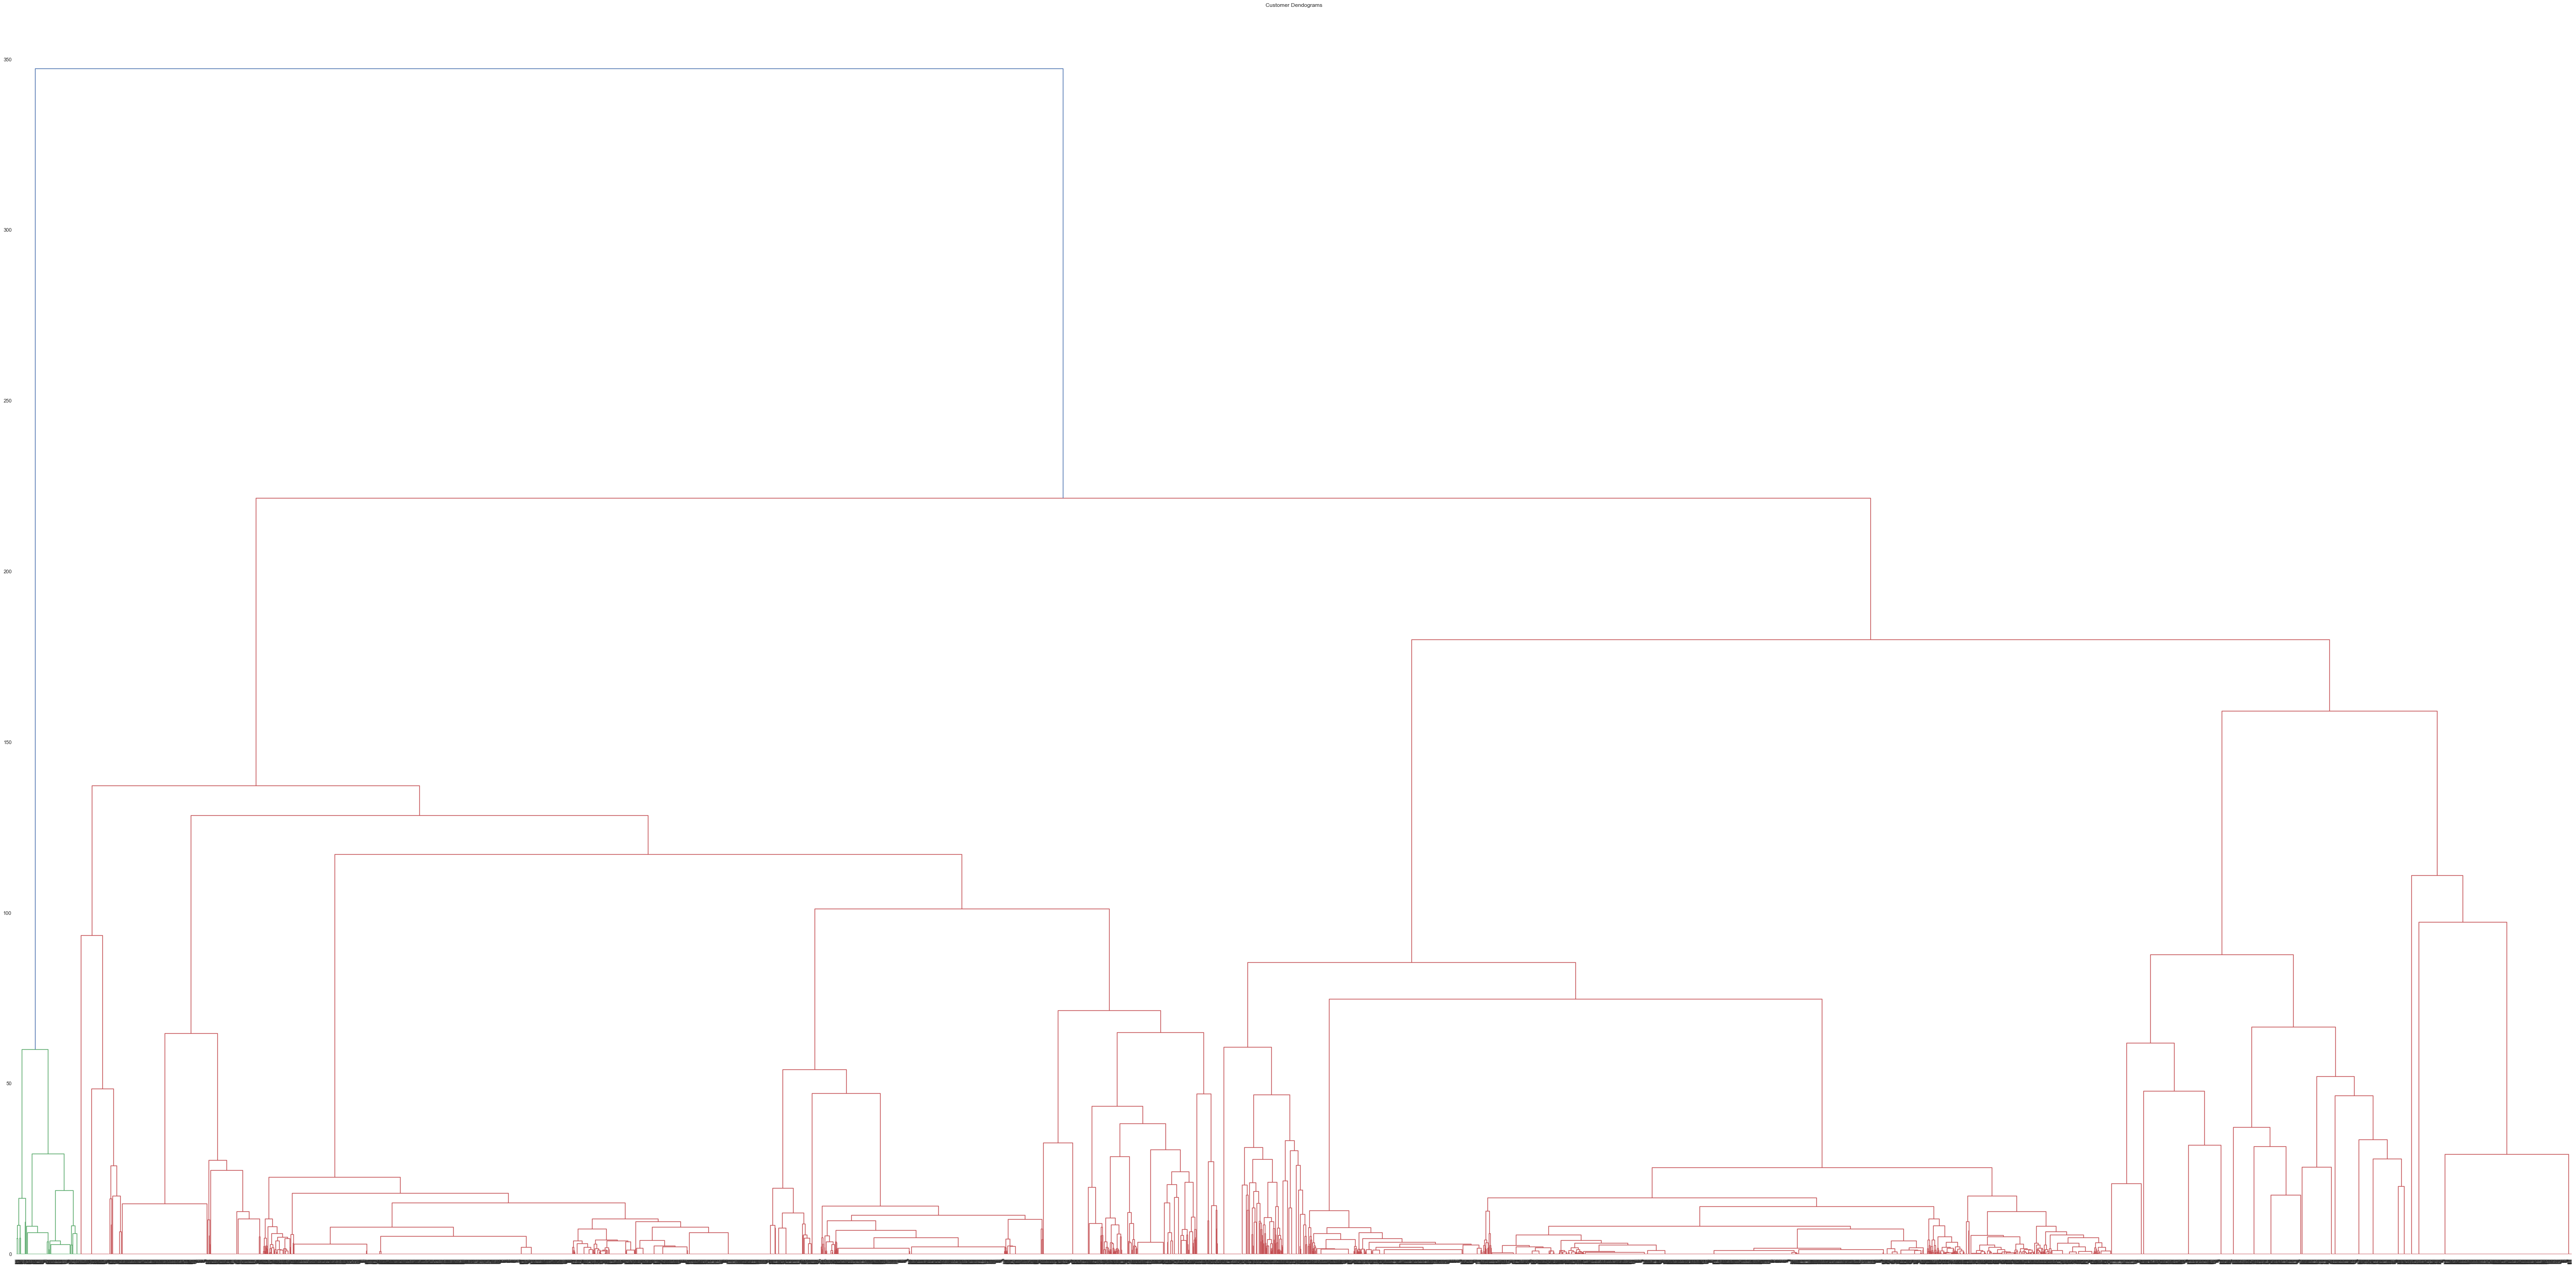

In [20]:
plt.figure(figsize=(100,50))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))  

In [ ]:
#dend('test.png', bbox_inches='tight')

In [21]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_scaled)
cluster


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [22]:
labels = cluster.labels_

In [23]:
#Glue back to originaal data
df['clusters'] = labels

In [24]:
df.head()
df.to_csv('quality.csv')

In [24]:
#Add the column into our list
mean_vars.extend(['clusters'])


In [25]:
#analyze the clusters
df[mean_vars].groupby(['clusters']).mean()

,meanpcip04,meanpcip11,meanpcip14,meanpcip15,meanpcip27,meanpcip40,meanpcip45,meanpcip51,meanpcip52,meaninexpfte,...,meanc150black,meanc150hisp,meanc150asian,meanc150aian,meanc150nhpi,meanappl_sch_pct_ge5,meancompletion_150,meancompletion_200,meanfulltime_retention,meantransfer150
clusters,,,,,,,,,,,,,,,,,,,,,
0,-0.000020,0.033673,0.021810,0.008347,0.006380,0.006723,0.024278,0.175908,0.181459,13270.068359,...,0.308683,0.381939,0.426979,0.289650,0.292447,0.147421,0.387948,0.401730,0.659948,0.154986
1,0.019393,-0.020921,0.153878,0.012926,0.026316,0.039420,0.131859,0.089678,-0.039302,123774.320312,...,0.828252,0.946389,0.711120,0.867216,0.210883,0.551553,0.878766,0.885272,0.937858,0.101273
2,0.003931,0.030957,0.025638,0.004142,0.007799,0.010940,0.032553,0.252088,0.177316,15567.947266,...,0.433434,0.512155,0.590818,0.557225,0.456545,0.174346,0.502817,0.487092,0.687451,0.106508


In [26]:
quality_tab=df[mean_vars].groupby(['clusters']).mean()
result = quality_tab.transpose()
print(result)
result.to_csv('summary stats.csv', sep=',')

clusters                           0              1             2
meanpcip04                 -0.000020       0.019393      0.003931
meanpcip11                  0.033673      -0.020921      0.030957
meanpcip14                  0.021810       0.153878      0.025638
meanpcip15                  0.008347       0.012926      0.004142
meanpcip27                  0.006380       0.026316      0.007799
meanpcip40                  0.006723       0.039420      0.010940
meanpcip45                  0.024278       0.131859      0.032553
meanpcip51                  0.175908       0.089678      0.252088
meanpcip52                  0.181459      -0.039302      0.177316
meaninexpfte            13270.068359  123774.320312  15567.947266
meanpftfac                  0.607587       0.705627      0.666808
meanc150white               0.418509       0.866290      0.500714
meanc150black               0.308683       0.828252      0.433434
meanc150hisp                0.381939       0.946389      0.512155
meanc150as

In [ ]:
df[mean_vars].groupby(['clusters']).describe().reset_index()

In [ ]:
grouped = df.groupby('clusters').agg(df[mean_vars]: [min, max, mean]) 
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [ ]:
np.round(df[mean_vars].groupby(['clusters']).describe(), 2).T[['count','mean', 'std', 'min', 'max']]


In [33]:
######################
#affordability model
######################

In [34]:
aff = "meanpctpell  meanpctfloan meanrpy_7yr_rt meancompl_rpy_7yr_rt meannoncom_rpy_7yr_rt meanlo_inc_rpy_7yr_rt meanmd_inc_rpy_7yr_rt meanhi_inc_rpy_7yr_rt meanpell_rpy_7yr_rt meannopell_rpy_7yr_rt meanfirstgen_rpy_7yr_rt meannotfirstgen_rpy_7yr_rt  meaninc_pct_m1 meaninc_pct_m2 meaninc_pct_lo meaninc_pct_h2  meanloan_ever meanpell_ever meanlowinc_rec_aid  meangrad_debt_mdn meanwdraw_debt_mdn meanlo_inc_debt_mdn meanmd_inc_debt_mdn meanhi_inc_debt_mdn meanpell_debt_mdn meannopell_debt_mdn meanfirstgen_debt_mdn meannotfirstgen_debt_mdn meancuml_debt_p75 meancuml_debt_p25 meanfaminc meanmd_faminc meanlowinc_netprice meanmiddleinc_netprice meanhighinc_netprice "

In [35]:
aff = aff.split()

In [36]:
df_aff=df[df.columns & aff]

In [37]:
df_aff.head()

,meanpctpell,meanpctfloan,meanrpy_7yr_rt,meancompl_rpy_7yr_rt,meannoncom_rpy_7yr_rt,meanlo_inc_rpy_7yr_rt,meanmd_inc_rpy_7yr_rt,meanhi_inc_rpy_7yr_rt,meanpell_rpy_7yr_rt,meannopell_rpy_7yr_rt,...,meancuml_debt_p75,meancuml_debt_p25,meanloan_ever,meanpell_ever,meanfaminc,meanmd_faminc,meanlowinc_netprice,meanmiddleinc_netprice,meanhighinc_netprice,meanlowinc_rec_aid
0,0.479822,0.544787,0.591748,0.703581,0.503470,0.546261,0.627535,0.699357,0.551237,0.666216,...,23633.021484,7089.456543,0.762640,0.709083,44744.464844,33027.609375,15868.617188,17473.398438,23358.998047,0.448660
1,0.358700,0.645500,0.654717,0.742188,0.572993,0.589286,0.642105,0.801724,0.598684,0.730088,...,25000.000000,5500.000000,0.939439,0.579025,66169.195312,49706.000000,13667.000000,15786.000000,21821.000000,0.189394
2,0.358700,0.645500,0.654717,0.742188,0.572993,0.589286,0.642105,0.801724,0.598684,0.730088,...,25000.000000,5500.000000,0.939439,0.579025,66169.195312,49706.000000,13667.000000,15786.000000,21821.000000,0.189394
3,0.478108,0.549601,0.594719,0.700819,0.506814,0.542637,0.633724,0.694858,0.549297,0.678536,...,23800.255859,7333.554199,0.779911,0.685409,47681.179688,34679.671875,15709.345703,17155.587891,23302.130859,0.429092
4,0.471933,0.543682,0.598908,0.709962,0.507999,0.551353,0.634165,0.704731,0.556930,0.673922,...,23718.082031,7001.302734,0.769487,0.702275,45768.628906,33643.945312,15531.329102,17164.750000,23155.623047,0.438443


In [38]:
aff=df_aff.columns.tolist()

In [39]:
# Standardizing the features
sc = StandardScaler()  
sc.fit(df_aff)
X_scaled = sc.transform(df_aff)  


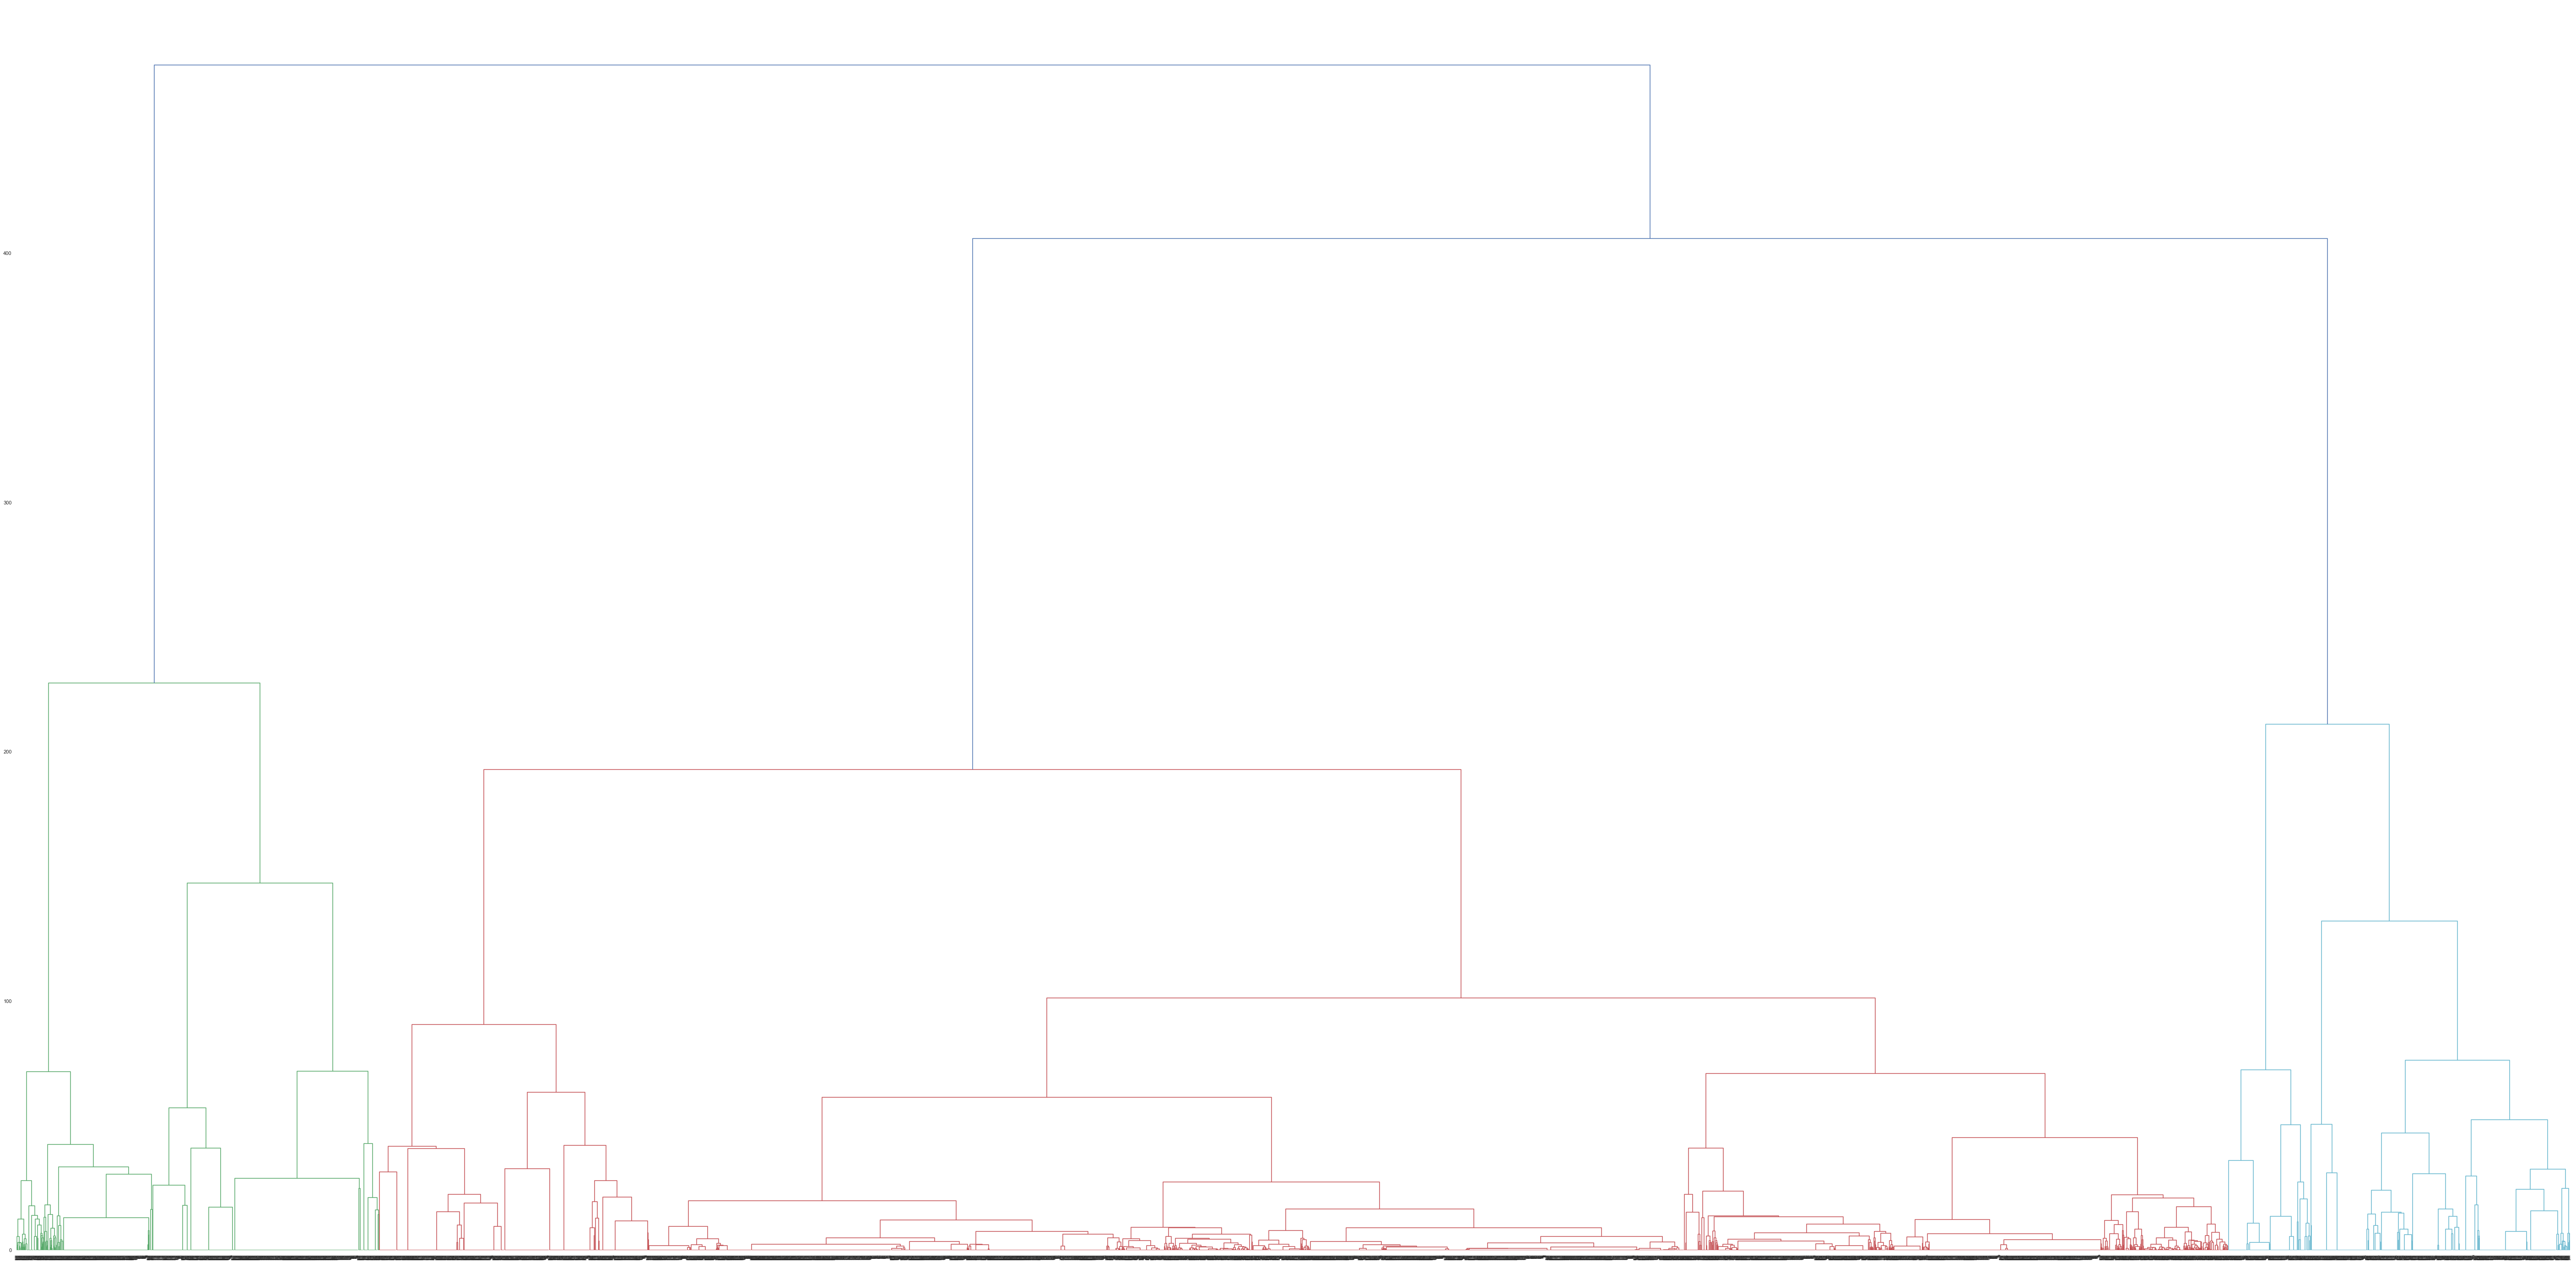

In [14]:
plt.figure(figsize=(100,50))  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))  

In [40]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_scaled)
cluster


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [41]:
cluster.labels_

array([2, 1, 1, ..., 1, 1, 2])

In [42]:
labels_aff = cluster.labels_

In [43]:
#Glue back to originaal data
df['clusters_aff'] = labels_aff

In [43]:
df.head()
df.to_csv('affordability.csv')

In [44]:
#Add the column into our list
aff.extend(['clusters_aff'])


In [45]:
print(aff)

['meanpctpell', 'meanpctfloan', 'meanrpy_7yr_rt', 'meancompl_rpy_7yr_rt', 'meannoncom_rpy_7yr_rt', 'meanlo_inc_rpy_7yr_rt', 'meanmd_inc_rpy_7yr_rt', 'meanhi_inc_rpy_7yr_rt', 'meanpell_rpy_7yr_rt', 'meannopell_rpy_7yr_rt', 'meanfirstgen_rpy_7yr_rt', 'meannotfirstgen_rpy_7yr_rt', 'meaninc_pct_lo', 'meaninc_pct_m1', 'meaninc_pct_m2', 'meaninc_pct_h2', 'meangrad_debt_mdn', 'meanwdraw_debt_mdn', 'meanlo_inc_debt_mdn', 'meanmd_inc_debt_mdn', 'meanhi_inc_debt_mdn', 'meanpell_debt_mdn', 'meannopell_debt_mdn', 'meanfirstgen_debt_mdn', 'meannotfirstgen_debt_mdn', 'meancuml_debt_p75', 'meancuml_debt_p25', 'meanloan_ever', 'meanpell_ever', 'meanfaminc', 'meanmd_faminc', 'meanlowinc_netprice', 'meanmiddleinc_netprice', 'meanhighinc_netprice', 'meanlowinc_rec_aid', 'clusters_aff']


In [46]:
#analyze the clusters
#df[aff].groupby(['clusters_aff']).mean()
aff_tab=df[aff].groupby(['clusters_aff']).mean()
result = aff_tab.transpose()
print(result)
result.to_csv('aff summary stats.csv', sep=',')




clusters_aff                           0             1             2
meanpctpell                     0.515032      0.296070      0.462982
meanpctfloan                    0.364070      0.496337      0.546626
meanrpy_7yr_rt                  0.517261      0.778343      0.588093
meancompl_rpy_7yr_rt            0.647901      0.868367      0.716718
meannoncom_rpy_7yr_rt           0.433160      0.680675      0.505778
meanlo_inc_rpy_7yr_rt           0.476079      0.709776      0.531977
meanmd_inc_rpy_7yr_rt           0.585389      0.779758      0.627581
meanhi_inc_rpy_7yr_rt           0.634723      0.851797      0.708126
meanpell_rpy_7yr_rt             0.485758      0.726646      0.538329
meannopell_rpy_7yr_rt           0.622716      0.830803      0.677742
meanfirstgen_rpy_7yr_rt         0.511567      0.739893      0.570022
meannotfirstgen_rpy_7yr_rt      0.523239      0.792595      0.598954
meaninc_pct_lo                  0.634197      0.326410      0.507379
meaninc_pct_m1                  0.

In [ ]:
##### holding code
#pca = PCA().fit(X_train)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');


 ##############################################
# Use Hierarchical (Agglomerative) Clustering
##############################################
#Use two clusters and complete linkage 
clusters_Agglomerative = AgglomerativeClustering(n_clusters=2, 
                            linkage='complete').fit_predict(X_scaled)



#if we want to plot dendrogram using single linkage 
clusters_Agglomerative_Scipi=hierarchy.linkage(X_scaled, 'single')
plt.figure(figsize=(50,20))
dn = hierarchy.dendrogram(clusters_Agglomerative_Scipi)

In [ ]:
#look at market by affordability and quality 2 and 4 year
#multiple imputation cluster analysis
#relative importance
#pca first and then clusters
#scale measures 
#look at do file 
#missingness




